## 正则使用

In [2]:
import matplotlib
print(matplotlib.__path__)

['/usr/local/lib/python3.7/site-packages/matplotlib']


In [3]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [4]:
coordination_source.split('\n')

['',
 "{name:'兰州', geoCoord:[103.73, 36.03]},",
 "{name:'嘉峪关', geoCoord:[98.17, 39.47]},",
 "{name:'西宁', geoCoord:[101.74, 36.56]},",
 "{name:'成都', geoCoord:[104.06, 30.67]},",
 "{name:'石家庄', geoCoord:[114.48, 38.03]},",
 "{name:'拉萨', geoCoord:[102.73, 25.04]},",
 "{name:'贵阳', geoCoord:[106.71, 26.57]},",
 "{name:'武汉', geoCoord:[114.31, 30.52]},",
 "{name:'郑州', geoCoord:[113.65, 34.76]},",
 "{name:'济南', geoCoord:[117, 36.65]},",
 "{name:'南京', geoCoord:[118.78, 32.04]},",
 "{name:'合肥', geoCoord:[117.27, 31.86]},",
 "{name:'杭州', geoCoord:[120.19, 30.26]},",
 "{name:'南昌', geoCoord:[115.89, 28.68]},",
 "{name:'福州', geoCoord:[119.3, 26.08]},",
 "{name:'广州', geoCoord:[113.23, 23.16]},",
 "{name:'长沙', geoCoord:[113, 28.21]},",
 "//{name:'海口', geoCoord:[110.35, 20.02]},",
 "{name:'沈阳', geoCoord:[123.38, 41.8]},",
 "{name:'长春', geoCoord:[125.35, 43.88]},",
 "{name:'哈尔滨', geoCoord:[126.63, 45.75]},",
 "{name:'太原', geoCoord:[112.53, 37.87]},",
 "{name:'西安', geoCoord:[108.95, 34.27]},",
 "//{name:

In [5]:
import re

In [6]:
def reguler_match(coordination_source):
    city_location = {}
    for line in coordination_source.split('\n'):
        if not line: continue
        pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+\.?\d+),\s+(\d+\.?\d+)\]")
        city, long, lat = re.findall(pattern, line)[0]
        city_location[city] = (float(long), float(lat))
    return city_location

In [7]:
city_location = reguler_match(coordination_source)

In [10]:
import networkx as nx
import math

In [11]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


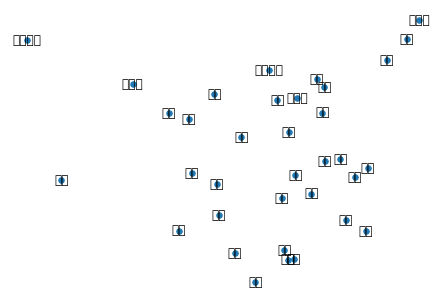

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [98]:
import matplotlib.pyplot as plt

In [106]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

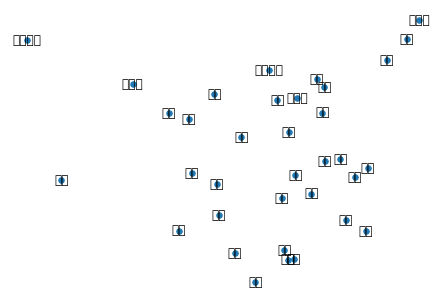

In [107]:
nx.draw(city_graph, city_location, with_labels=True, node_size=30)

In [51]:
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [52]:
distence = 300

In [53]:
geo_distance(city_location['北京'], city_location['哈尔滨'])

1179.4354028957505

In [54]:
city_connection = {}

In [55]:
for city_start in city_location:
    connection = []
    for city_stop in city_location:
        if city_start == city_stop: continue
        if geo_distance(city_location[city_start], city_location[city_stop]) <= distence:
            connection.append(city_stop)
        else:
            continue
    city_connection[city_start] = connection

In [56]:
city_connection

{'兰州': ['西宁', '成都', '银川'],
 '嘉峪关': [],
 '西宁': ['兰州', '成都', '拉萨'],
 '成都': ['兰州', '西宁', '拉萨', '重庆'],
 '石家庄': ['郑州', '济南', '太原', '北京'],
 '拉萨': ['西宁', '成都'],
 '贵阳': ['重庆', '南宁'],
 '武汉': ['郑州', '南昌', '长沙'],
 '郑州': ['石家庄', '武汉', '长沙', '太原'],
 '济南': ['石家庄', '合肥', '北京', '天津'],
 '南京': ['合肥', '杭州'],
 '合肥': ['济南', '南京', '南昌'],
 '杭州': ['南京', '福州', '上海'],
 '南昌': ['武汉', '合肥'],
 '福州': ['杭州', '台湾'],
 '广州': ['长沙', '香港', '澳门'],
 '长沙': ['武汉', '郑州', '广州', '香港', '澳门'],
 '海口': ['南宁'],
 '沈阳': ['长春'],
 '长春': ['沈阳', '哈尔滨'],
 '哈尔滨': ['长春'],
 '太原': ['石家庄', '郑州', '呼和浩特'],
 '西安': [],
 '台湾': ['福州'],
 '北京': ['石家庄', '济南', '天津'],
 '上海': ['杭州'],
 '重庆': ['成都', '贵阳', '银川'],
 '天津': ['济南', '北京'],
 '呼和浩特': ['太原'],
 '南宁': ['贵阳', '海口'],
 '西藏': [],
 '银川': ['兰州', '重庆'],
 '乌鲁木齐': [],
 '香港': ['广州', '长沙', '澳门'],
 '澳门': ['广州', '长沙', '香港']}

In [57]:
city_with_road = nx.Graph(city_connection)
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

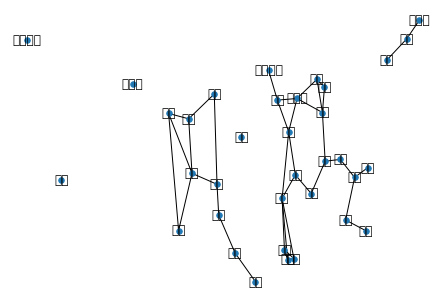

In [58]:
nx.draw(city_with_road, city_location, with_labels=True, node_size=30)

In [81]:
definition = {1: [2, 3],
              2: [1, 4],
              3: [1, 5],
              4: [2, 6],
              5: [3, 7]}

In [82]:
from collections import defaultdict
definition = defaultdict(list)
definition.update( {1: [2, 3],
              2: [1, 4],
              3: [1, 5],
              4: [2, 6],
              5: [3, 7]})

In [61]:
def bfs(graph, start):
    """
    breath first search
    """
    visited = [start]  # [1]
    
    seen = set()
     
    while visited:
        froninter = visited.pop() # 1
        
        if froninter in seen: continue
        
        for successor in graph[froninter]: #[2, 3]
            if successor in seen: continue
            print(successor)
            
            #visited = visited + [successor] # 我们每次扩展都扩展最新发现的点 -> depth first
            visited = [successor] + visited # 我们每次扩展都先考虑已经发现的 老的点 -> breath first
            
            # 所以说，这个扩展顺序其实是决定了我们的深度优先还是广度优先
    
        seen.add(froninter)
    
    return seen

In [62]:
bfs(definition, 1)


2
3
4
5
6
7


{1, 2, 3, 4, 5, 6, 7}

In [89]:
def bfs_m(graph, start):
    seened = list()
    visited = [start] 
    while visited:
        current_visit = visited.pop(-1) # pop最后一个 
        for successor in graph[current_visit]:
            if successor in seened: continue
#             print(successor)
            visited = visited + [successor]
#             visited = [successor] + visited
        seened.append(current_visit)
    return seened
    

In [108]:
bfs_m(definition, 1)

2
3
5
7
4
6


[1, 3, 5, 7, 2, 4, 6]

In [205]:
def search_path(start, destination, connection_grpah):
    pathes = [[start]] # 记录经过的城市
    visitied = set() # 记录将要经过的城市
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visitied: continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        visitied.add(froninter)

In [206]:
def search(start, destination, connection_grpah):
    pathes = [[start]]
    visitied = set()
    while pathes: 
        path = pathes.pop(0)
        froninter = path[-1] 
        if froninter in visitied: continue   
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop    
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        visitied.add(froninter)
        


In [207]:
print(search_path('北京', '上海', city_connection))

['北京', '济南', '合肥', '南京', '杭州', '上海']


In [198]:
print(search_path(city_connection, '北京', '上海'))

None


In [16]:
import requests
with open('../../../beijing.xml') as f:
    datas = f.read()

In [17]:
res = requests.get(url)

NameError: name 'url' is not defined

In [18]:
import re

In [19]:
pattern = re.compile('\s+lb="(\w+)"')

In [20]:
station = re.findall(pattern, datas)

In [140]:
pattern1 = re.compile('<l lid="\w+" lb="(\w+)"')

In [141]:
lines = re.findall(pattern1, datas)

In [142]:
subways = {}

In [143]:
lines.insert(6, '8号线北')
lines.insert(7, '8号线南')

In [144]:
lines

['1号线',
 '2号线',
 '4号线大兴线',
 '5号线',
 '6号线',
 '7号线',
 '8号线北',
 '8号线南',
 '9号线',
 '10号线',
 '13号线',
 '15号线',
 '16号线',
 '八通线',
 '房山线',
 '昌平线',
 '亦庄线',
 '燕房线',
 'S1线',
 '西郊线',
 '机场线']

In [146]:
import json
def subway_location_func(address):
    params = {'address': address,
                      'city': '北京',
                      'key': 'c498f052ee8837679469e79f9f9dd400'}
    request = requests.request('get', url='https://restapi.amap.com/v3/geocode/geo?', params=params)
    r = json.loads(request.text)
    try:
        return r['geocodes'][0]['location']
    except Exception as e:
        print(address)
        return None

In [162]:
tuple(subway_location_func('茶棚(地铁站)').split(','))

('116.403070', '39.933814')

In [148]:
subway_location = {}
for s in station:
    if s not in lines and s not in subway_location:
        x_y = subway_location_func(s)
        if x_y:
            location = tuple(x_y.split(','))
        else:
            x_y = subway_location_func(s+'地铁站')
            if not x_y:
                continue
            location = tuple(x_y.split(','))
        subway_location[s] = location if location else (0, 0)

国贸
前门
西苑
西四
新宫
东四
北海北
草房
通运门
化工
南楼梓庄
和义
火箭万源
德茂
德茂地铁站
泥洼
北苑
阜通
枣营
景泰
国展
屯佃
星城
紫草坞
紫草坞地铁站
小园
上岸
万安
万安地铁站
茶棚
茶棚地铁站


In [182]:
subway_location['德茂'] = ('116.435524', '39.980470')
subway_location['紫草坞'] = ('116.403070', '39.933814')
subway_location['万安'] = ('116.160356', '40.067916')
subway_location['茶棚'] = ('116.403070', '39.933814')


In [181]:
subway_location.pop('紫草屋')

('116.403070', '39.933814')

In [183]:
subway_location

{'苹果园': ('116.179364', '39.926582'),
 '古城': ('116.188462', '39.911362'),
 '八角游乐园': ('116.208596', '39.912045'),
 '八宝山': ('116.236669', '39.907681'),
 '玉泉路': ('116.252419', '39.900692'),
 '五棵松': ('116.276703', '39.908738'),
 '万寿路': ('116.295846', '39.901310'),
 '公主坟': ('116.187855', '39.804608'),
 '军事博物馆': ('116.316876', '39.902067'),
 '木樨地': ('116.333916', '39.908460'),
 '南礼士路': ('116.352891', '39.922123'),
 '复兴门': ('116.353180', '39.906006'),
 '西单': ('116.374072', '39.907383'),
 '天安门西': ('116.397477', '39.908692'),
 '天安门东': ('116.397477', '39.908692'),
 '王府井': ('116.412422', '39.908966'),
 '东单': ('116.419375', '39.909821'),
 '建国门': ('116.435979', '39.908117'),
 '永安里': ('116.232361', '40.211305'),
 '国贸': ('116.461841', '39.909104'),
 '大望路': ('116.480570', '39.910341'),
 '四惠': ('116.495670', '39.910290'),
 '四惠东': ('116.507591', '39.930566'),
 '西直门': ('116.355423', '39.940475'),
 '积水潭': ('116.372779', '39.948033'),
 '鼓楼大街': ('116.267663', '40.184460'),
 '安定门': ('116.410777', '39.952308')

In [172]:
for i in range(len(lines)):
    if lines[i] == '机场线':
        subways[lines[i]] = station[station.index(lines[i])+1:]
    else:
        subways[lines[i]] = station[station.index(lines[i])+1:station.index(lines[i+1])]
    

In [200]:
subway_map = {}
for sub, vals in subways.items():
    for i, v in enumerate(vals):
        if v not in subway_map:
            if i == 0:
                subway_map[v] = [vals[i+1]]
            elif i == (len(vals) -1):
                subway_map[v] = [vals[i-1]]
            else:
                subway_map[v] = [vals[i-1], vals[i+1]]
        else:
            if i == 0:
                subway_map[v] = subway_map[v] + [vals[i+1]]
            elif i == (len(vals) -1):
                subway_map[v] = subway_map[v] + [vals[i-1]]
            else:
                subway_map[v] = subway_map[v] + [vals[i-1], vals[i+1]]

In [202]:
subway_map

{'苹果园': ['古城', '金安桥', '杨庄'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '灯市口', '崇文门'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '金台路', '九龙山'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '西直门': ['积水潭', '动物园', '新街口', '大钟寺'],
 '积水潭': ['西直门', '鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '和平里北街', '北新桥'],
 '东直门': ['雍和宫', '东四十条', '柳芳', '西局', '三元桥', '三元桥'],
 '东四十条': ['东直门', '朝阳门'],
 '朝阳门': ['东四十条', '建国门', '东四', '东大桥'],
 '北京站': ['建国门', '崇文门'],
 

In [192]:
for k, v in subway_location.items():
    subway_location[k] = (float(v[0]), float(v[1]))

In [193]:
subway_location

{'苹果园': (116.179364, 39.926582),
 '古城': (116.188462, 39.911362),
 '八角游乐园': (116.208596, 39.912045),
 '八宝山': (116.236669, 39.907681),
 '玉泉路': (116.252419, 39.900692),
 '五棵松': (116.276703, 39.908738),
 '万寿路': (116.295846, 39.90131),
 '公主坟': (116.187855, 39.804608),
 '军事博物馆': (116.316876, 39.902067),
 '木樨地': (116.333916, 39.90846),
 '南礼士路': (116.352891, 39.922123),
 '复兴门': (116.35318, 39.906006),
 '西单': (116.374072, 39.907383),
 '天安门西': (116.397477, 39.908692),
 '天安门东': (116.397477, 39.908692),
 '王府井': (116.412422, 39.908966),
 '东单': (116.419375, 39.909821),
 '建国门': (116.435979, 39.908117),
 '永安里': (116.232361, 40.211305),
 '国贸': (116.461841, 39.909104),
 '大望路': (116.48057, 39.910341),
 '四惠': (116.49567, 39.91029),
 '四惠东': (116.507591, 39.930566),
 '西直门': (116.355423, 39.940475),
 '积水潭': (116.372779, 39.948033),
 '鼓楼大街': (116.267663, 40.18446),
 '安定门': (116.410777, 39.952308),
 '雍和宫': (116.417795, 39.945371),
 '东直门': (116.441822, 39.930855),
 '东四十条': (116.429276, 39.933874),
 '朝阳门': (116.

In [195]:
import math
def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [197]:
geo_distance(subway_location['十里河'], subway_location['潘家园'])

0.9404132305574658

In [203]:
subway_map

{'苹果园': ['古城', '金安桥', '杨庄'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '灯市口', '崇文门'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '金台路', '九龙山'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '西直门': ['积水潭', '动物园', '新街口', '大钟寺'],
 '积水潭': ['西直门', '鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '和平里北街', '北新桥'],
 '东直门': ['雍和宫', '东四十条', '柳芳', '西局', '三元桥', '三元桥'],
 '东四十条': ['东直门', '朝阳门'],
 '朝阳门': ['东四十条', '建国门', '东四', '东大桥'],
 '北京站': ['建国门', '崇文门'],
 

In [223]:
def search(start, stop, subway_map):
    pathes = [[start]]
    visited = []
    all_pathes = []
    while pathes:
        path = pathes.pop()
        current_station = path[-1]
        for succ in subway_map[current_station]:
            if succ in visited: continue
            new_path = path + [succ]
            pathes.append(new_path)
            if succ == stop:
                all_pathes.append(new_path)
        visited.append(current_station)
    return all_pathes

In [225]:
search('十里河', '国贸', subway_map)

[['十里河',
  '方庄',
  '蒲黄榆',
  '景泰',
  '永定门外',
  '陶然桥',
  '北京南站',
  '陶然亭',
  '菜市口',
  '虎坊桥',
  '珠市口',
  '桥湾',
  '磁器口',
  '广渠门内',
  '广渠门外',
  '九龙山',
  '大望路',
  '国贸'],
 ['十里河',
  '方庄',
  '蒲黄榆',
  '景泰',
  '永定门外',
  '陶然桥',
  '北京南站',
  '陶然亭',
  '菜市口',
  '虎坊桥',
  '珠市口',
  '桥湾',
  '磁器口',
  '广渠门内',
  '广渠门外',
  '九龙山',
  '大望路',
  '金台路',
  '朝阳公园',
  '枣营',
  '东风北桥',
  '将台',
  '高家园',
  '望京南',
  '阜通',
  '望京',
  '望京西',
  '关庄',
  '大屯路东',
  '安立路',
  '奥林匹克公园',
  '奥体中心',
  '北土城',
  '安贞门',
  '惠新西街南口',
  '芍药居',
  '光熙门',
  '柳芳',
  '东直门',
  '三元桥',
  '亮马桥',
  '农业展览馆',
  '团结湖',
  '呼家楼',
  '金台夕照',
  '国贸']]

In [214]:
path.pop()

2

In [216]:
path[-1]

1